![](https://witsq.github.io/images/banner.png)

# Deutsch-Josza
_Conrad Haupt, WitsQ Team_

$\newcommand{\ket}[1]{\left|\,{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle\,{#1}\right|}$
$\newcommand{\abs}[1]{\left|{#1}\right|}$

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, BasicAer
from qiskit import aqua,Aer
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
from IPython.display import display, Math
%matplotlib inline

In [2]:
def simulate(circuit):
    backend = Aer.get_backend('statevector_simulator')
    results = execute(circuit,backend).result()
    return results
def dectobin(value,len=None):
    if len is None:
        len=np.log2(value) + 1
    if len >= 1:
        return dectobin(value/2,len-1) + ('%d' % (value%2))
    else:
        return ''
def printresults(results,index):
    vec = results.get_statevector()
    display(Math(r'\ket{{\psi_{}}} = '.format(index) + r' + '.join([r'{}\ket{{{}}}'.format(np.around(x,2),dectobin(i,np.log2(len(vec)))) for i,x in enumerate(vec)])))

In [3]:
# Create registers and output variables
qr = QuantumRegister(2)
qr_anc = QuantumRegister(1)
results = []

<IPython.core.display.Math object>

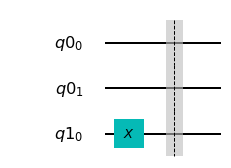

In [4]:
dj = QuantumCircuit(qr,qr_anc)
dj.x(2)
results.append(simulate(dj))
printresults(results[-1],0)
dj.barrier()
dj.draw(output='mpl')

<IPython.core.display.Math object>

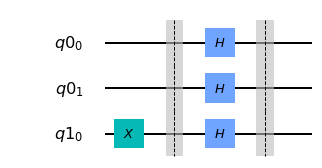

In [5]:
dj.h([0,1,2])
results.append(simulate(dj))
printresults(results[-1],1)
dj.barrier()
dj.draw(output='mpl')

<IPython.core.display.Math object>

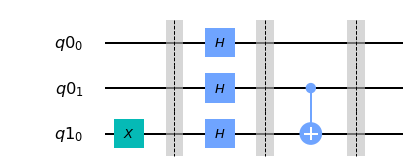

In [6]:
dj.cx(qr[1],qr_anc[0])
results.append(simulate(dj))
printresults(results[-1],2)
dj.barrier()
dj.draw(output='mpl')

<IPython.core.display.Math object>

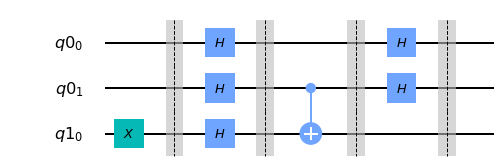

In [7]:
dj.h([0,1])
results.append(simulate(dj))
printresults(results[-1],3)
dj.barrier()
dj.draw(output='mpl')

In [8]:
for i,r in enumerate(results):
    printresults(r,i)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Building a sub-circuit as an Oracle for DJ

In [9]:
qr_2 = QuantumRegister(4)
cr_2 = ClassicalRegister(3)
circ_2 = QuantumCircuit(qr_2,cr_2)
results_2 = []

<IPython.core.display.Math object>

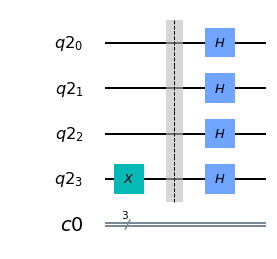

In [10]:
circ_2.x(3)
circ_2.barrier()
circ_2.h(qr_2)
# circ_2.barrier()
results_2.append(simulate(circ_2))
printresults(results_2[-1],0)
circ_2.draw(output='mpl')

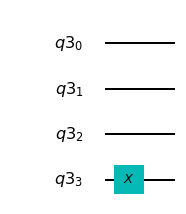

In [11]:
# Our function is balanced as our output is f(x) = 1 if q0 xor q1 is 1
qr_oracle = QuantumRegister(4)
oracle = QuantumCircuit(qr_oracle,name='oracle')
# oracle.cx(0,3)
# oracle.cx(1,3)
oracle.x(3)
oracle.draw(output='mpl')

<IPython.core.display.Math object>

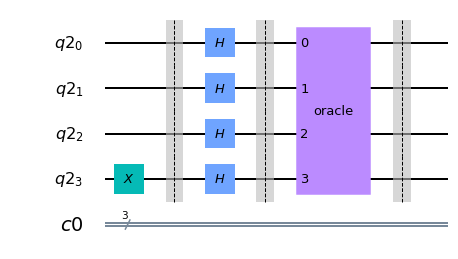

In [12]:
# Add Oracle circuit as sub-circuit
circ_2.barrier()
circ_2.append(oracle.to_instruction(),qr_2)
circ_2.barrier()
results_2.append(simulate(circ_2.decompose()))
printresults(results_2[-1],0)
circ_2.draw(output='mpl')

<IPython.core.display.Math object>

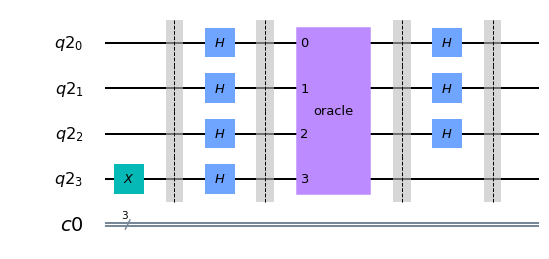

In [13]:
circ_2.h(qr_2[0:-1])
circ_2.barrier()
results_2.append(simulate(circ_2))
printresults(results_2[-1],0)
circ_2.draw(output='mpl')

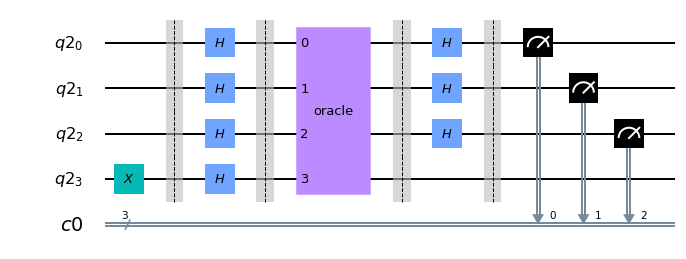

In [14]:
circ_2.measure(qr_2[0:3],cr_2[0:3])
circ_2.draw(output='mpl')

In [15]:
circ_2.decompose().draw(output='mpl')

In [16]:
# Print our final list of state-vectors
for i,r in enumerate(results_2):
    printresults(r,i)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The probability in $\ket{\psi_3}$ of getting $\ket{x}\ket{000}$ is 0, therefore the function f(x) is balanced. We use $\ket{x}$ to denote qubit 3 which is disgarded. The statevector simulator still computes for four qubits and so we need to post-process the resulting statevectors.